# ESPM Course 2025
## First notebook
Simple diffusion equation with comparison to the analytical solution to a sinusoidal relaxation case

In [18]:
import numpy as np
import matplotlib.pyplot as plt


We try to solve the time-dependent diffusion equation:
$$\frac{\partial h}{\partial t}=K_d\frac{\partial^2h}{\partial x^2}$$
with the following initial condition:
$$h(t=0)=h_0\sin(2\pi nx/L)$$
and boundary conditions:
$$h(x=0;x=L)=0$$
using a centered-difference, explicit finite difference scheme:
$$h_i(t+\Delta t)=h_i(t)+\frac{\Delta tK_d}{\Delta x^2}(h_{i+1}(t)-2h_i(t)+h_{i-1}(t))$$

In [23]:
xl = 1000 # (m)
nx = 101
x = np.linspace(0, xl, nx)
dx = xl/(nx - 1)
Kd = 1e-2 # (m^2/yr)
n = 1
h0 = 100 # (m)
taun = xl**2/Kd/4/np.pi**2/n**2
dt = taun/1e3
nstep = 1001

courant = dt*Kd/dx**2
print('tau:',taun,'dt:',dt,'Courant condition:',courant)

tau: 2533029.591058444 dt: 2533.029591058444 Courant condition: 0.25330295910584444


We compute the time dependent solution using an explicit finite difference formulation and plot the solution at 11 time steps

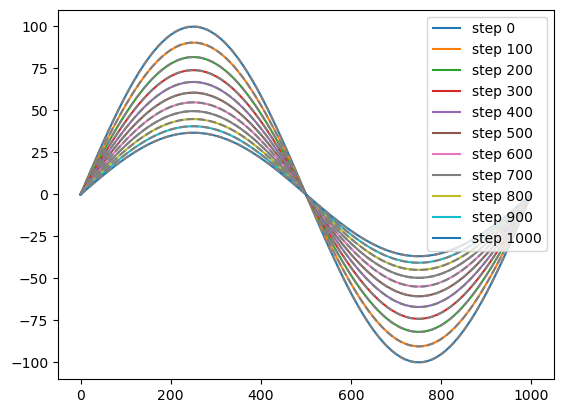

In [25]:
h = h0*np.sin(x/xl*2*np.pi*n)

for step in range(nstep):
    h[1:-1] = h[1:-1] + dt*Kd/dx**2*(h[2:] - 2*h[1:-1] + h[:-2])
    if step%(nstep//10)==0:
        plt.plot(x, h, label=f'step {step}')
        ha = h0*np.sin(2*np.pi*x*n/xl)*np.exp(-dt*step/taun)
        plt.plot(x, ha, '--', c='grey')
plt.legend();

We improve the figure and save it as a PDF

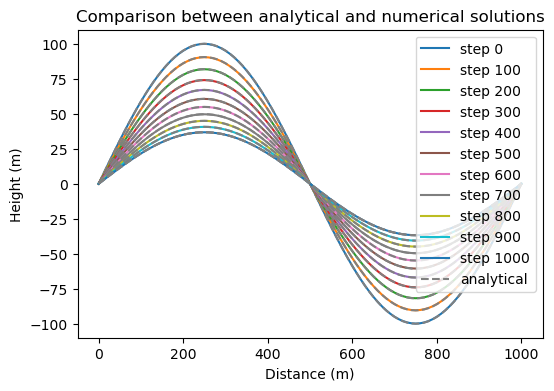

In [26]:
fig, ax = plt.subplots(figsize=(6,4))

h = h0*np.sin(x/xl*2*np.pi*n)

for step in range(nstep):
    h[1:-1] = h[1:-1] + dt*Kd/dx**2*(h[2:] - 2*h[1:-1] + h[:-2])
    if step%(nstep//10)==0:
        ax.plot(x, h, label=f'step {step}')
        ha = h0*np.sin(2*np.pi*x*n/xl)*np.exp(-dt*step/taun)
        ax.plot(x, ha, '--', c='grey')

ax.plot(x, ha, '--', c='grey', label='analytical')
        
ax.legend()
ax.set_title('Comparison between analytical and numerical solutions')
ax.set_xlabel('Distance (m)')
ax.set_ylabel('Height (m)')

fig.savefig('comparison.pdf');